# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from src.helpers import *

Had to perform the following to get `librosa.load()` to work properly after encountering `Error 0x7e: cannot load sndfile.dll`
```sh
pip uninstall soundfile
pip install soundfile
```

# Read Data

In [2]:
raw_audio_handler = RawAudioHandler('../../data/playlist-1', limit=1)
raw_audio = raw_audio_handler.load()

In [3]:
audio = raw_audio[0]
audio.name

'Bruno Major - Easily'

# Extract Features from Data

In [4]:
audio_processor = AudioProcessor(audio)
audio_processor

In [5]:
feature_vector, feature_repr = audio_processor.process()

In [31]:
processed_audio = [(feature_vector, feature_repr)]

In [33]:
from src.helpers import AudioRepository
AudioRepository.store_processed_audio('../../data/playlist-1', processed_audio)

# Visualising the Input Data

## Waveform

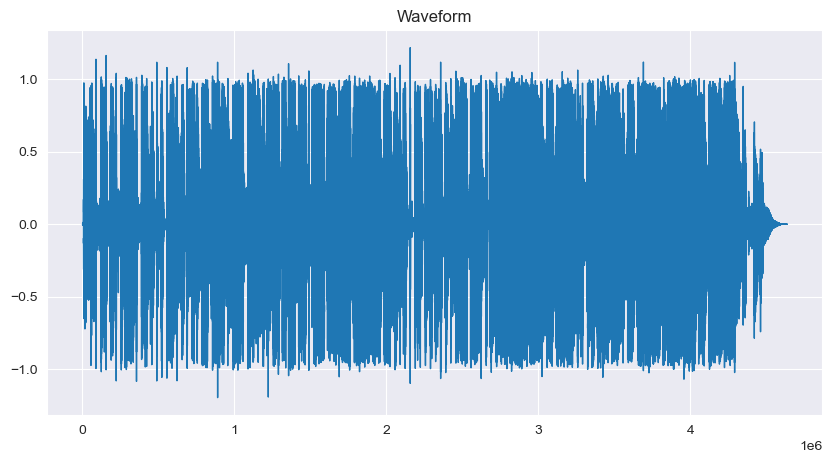

In [8]:
pd.Series(audio.waveform).plot(figsize=(10,5), lw=1, title='Waveform')
plt.show()

## Spectrogram

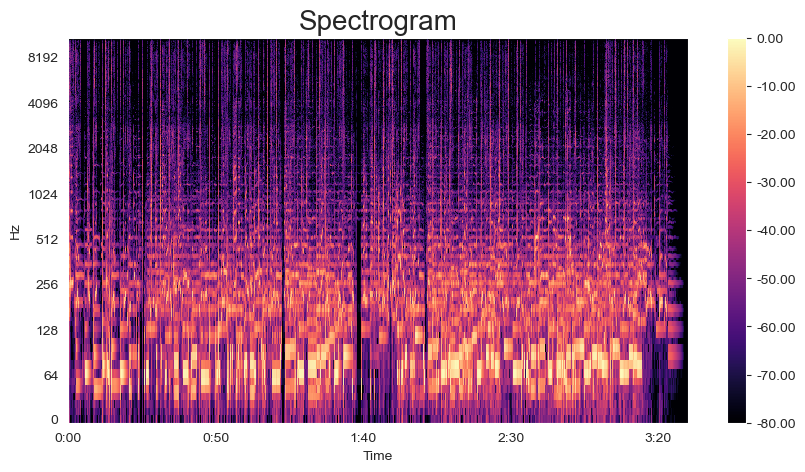

In [9]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.spectrogram, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

## Mel Spectrogram

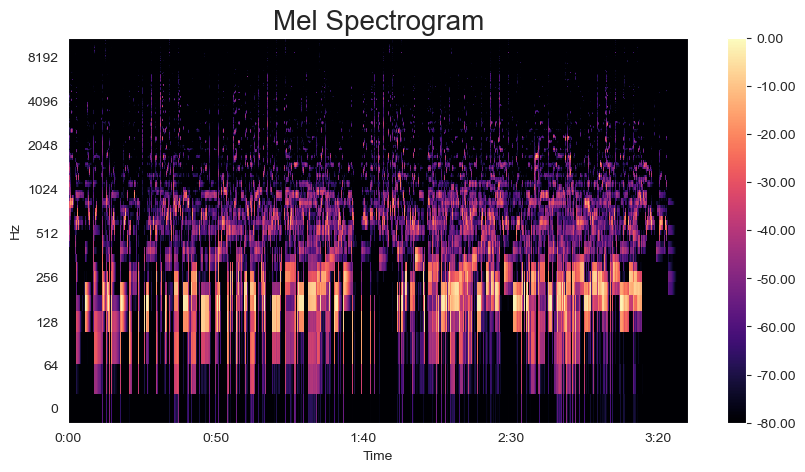

In [10]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.mel_spectrogram, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

# Timbral Texture Feature Extraction

## Spectral Centroid

In [11]:
# Spectral centroid
feature_vector.spectral.spectral_centroid_mean , feature_vector.spectral.spectral_centroid_var

(1325.7054617330377, 1281488.0566162518)

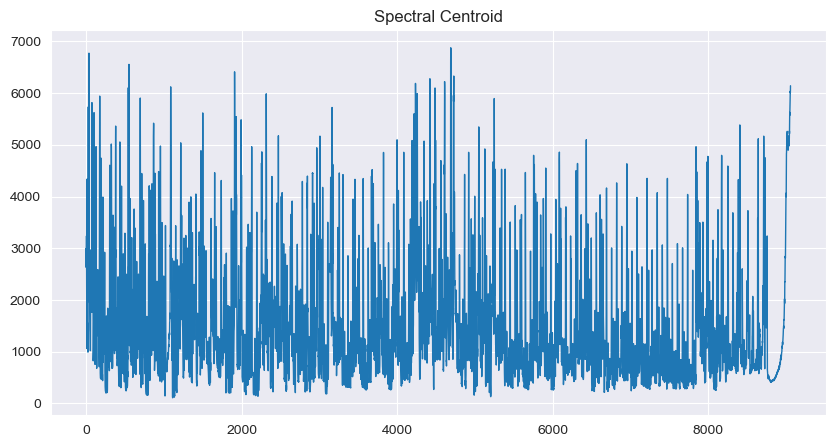

In [12]:
pd.Series(feature_repr.spectral_centroid).plot(figsize=(10,5), lw=1, title='Spectral Centroid')
plt.show()

## Spectral Rolloff

In [13]:
# Spectral rolloff
feature_vector.spectral.spectral_rolloff_mean , feature_vector.spectral.spectral_rolloff_var

(2646.14886565606, 6999131.99367788)

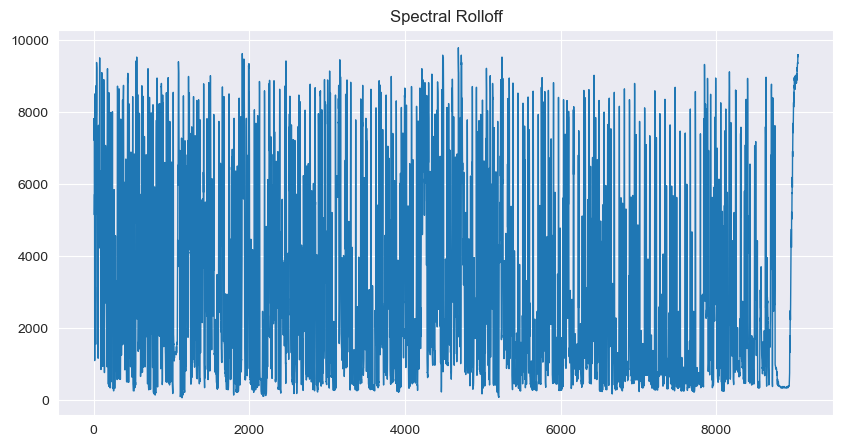

In [14]:
pd.Series(feature_repr.spectral_rolloff).plot(figsize=(10,5), lw=1, title='Spectral Rolloff')
plt.show()

## Spectral Flux

In [15]:
# Spectral flux
# squared distance between normalised magnitudes of successive spectral distributions
feature_vector.spectral.spectral_flux_mean , feature_vector.spectral.spectral_flux_var

(1.4059865, 4.3806458)

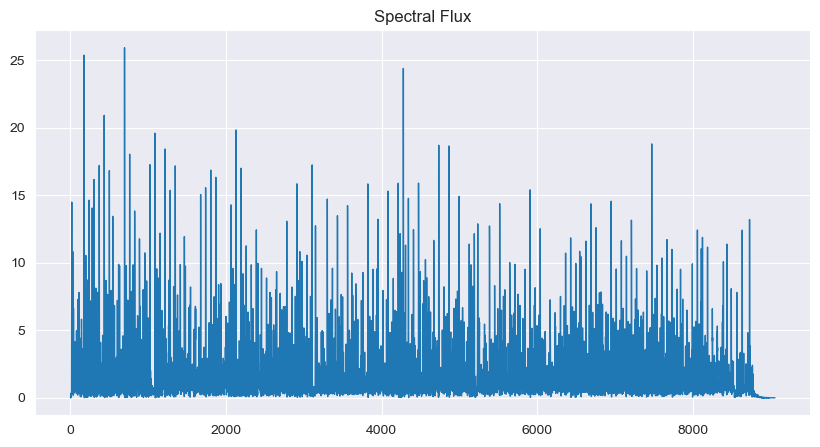

In [16]:
pd.Series(feature_repr.spectral_flux).plot(figsize=(10,5), lw=1, title='Spectral Flux')
plt.show()

## Time Domain Zero Crossings

In [17]:
feature_vector.temporal.zero_crossings_mean, feature_vector.temporal.zero_crossings_var

(0.04095028422327835, 0.03927335844531111)

In [18]:
feature_repr.zero_crossings
# might not be exactly the same as Tzanetakis' implementation

array([ True, False,  True, ..., False,  True, False])

## MFCC Extraction

13 MFCC coefficients, and using only the first 5 excluding DC component

In [19]:
cepstral_coefficients_df = pd.DataFrame(feature_repr.mfccs).transpose()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

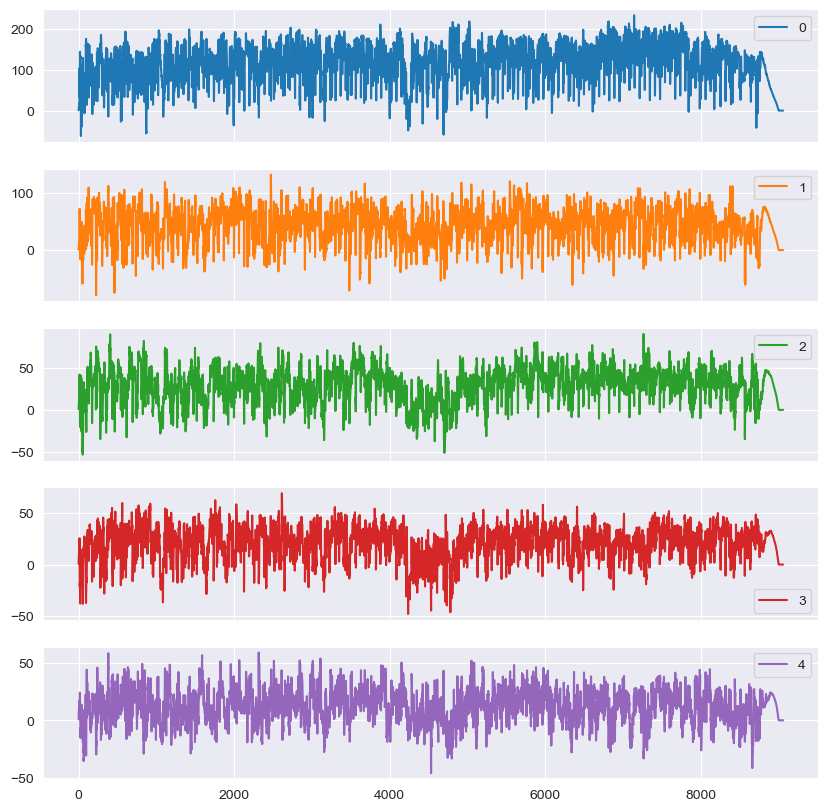

In [20]:
cepstral_coefficients_df.plot(subplots=True, figsize=(10,10))

In [21]:
cepstral_coefficients_df.mean()

0    122.607567
1     41.752369
2     29.401342
3     20.773031
4     11.525144
dtype: float32

In [22]:
cepstral_coefficients_df.var()

0    2342.692627
1     830.175537
2     423.783661
3     245.135269
4     202.661499
dtype: float32

# Chord Trajectory

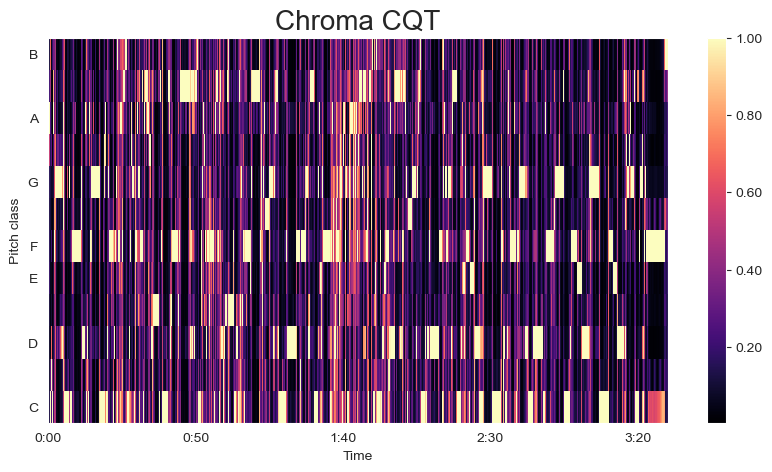

In [23]:
# CQT used for harmonic content over STFT for rhythmic content
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.chroma_cqt, x_axis='time', y_axis='chroma', ax=ax)
ax.set_title('Chroma CQT', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

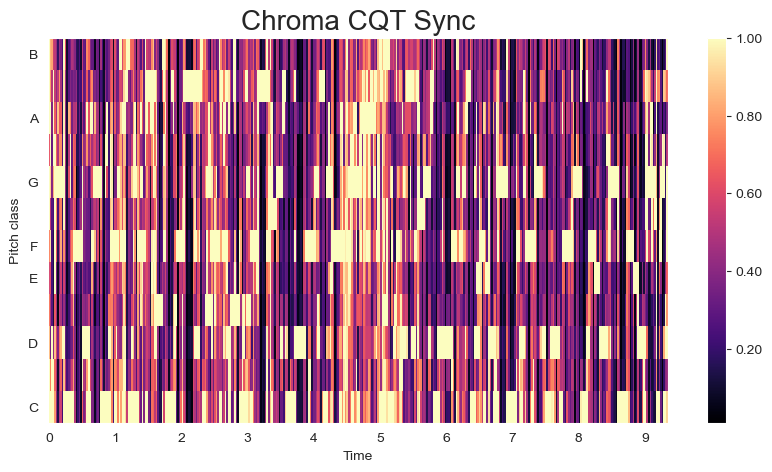

In [24]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.chroma_cqt_sync, x_axis='time', y_axis='chroma', ax=ax)
ax.set_title('Chroma CQT Sync', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

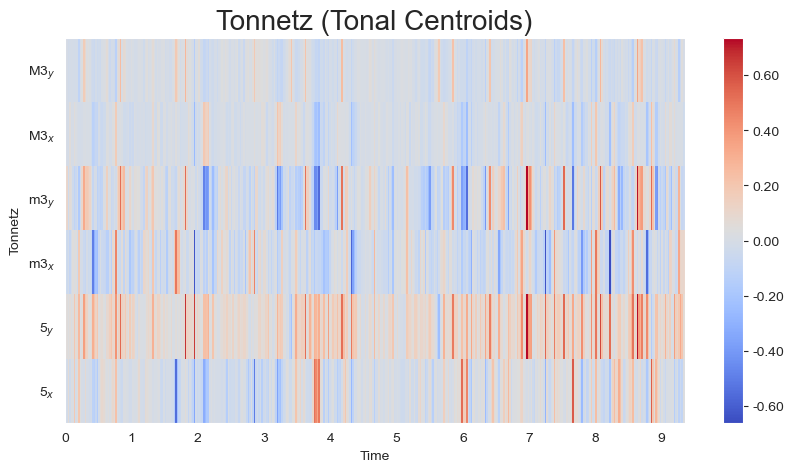

In [25]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.tonnetz, x_axis='time', y_axis='tonnetz', ax=ax)
ax.set_title('Tonnetz (Tonal Centroids)', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

<Axes: >

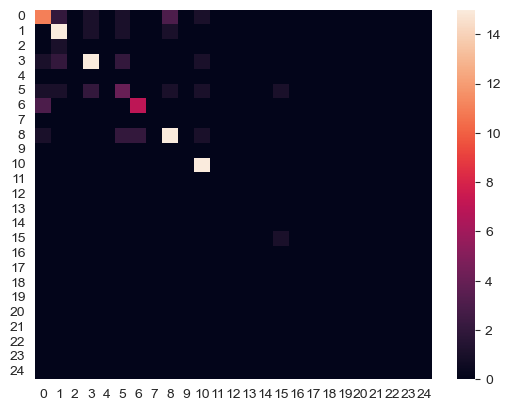

In [26]:
sns.heatmap(feature_repr.chord_trajectory, vmin=0, vmax=15)

In [27]:
# Most likely key signature
feature_vector.harmonic.key_signature

8

<Axes: >

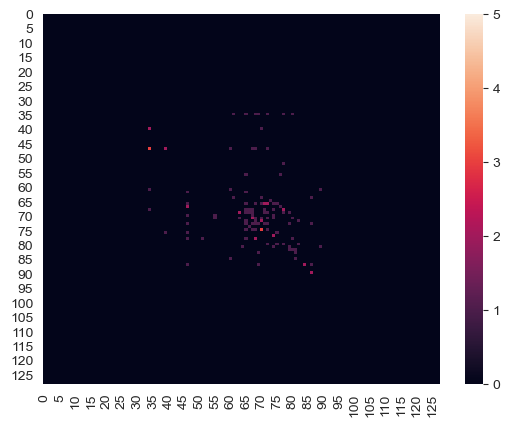

In [28]:
sns.heatmap(feature_repr.note_trajectory, vmin=0, vmax=5)

In [29]:
reduced = PCA(n_components=1).fit_transform(feature_repr.note_trajectory)

<Axes: >

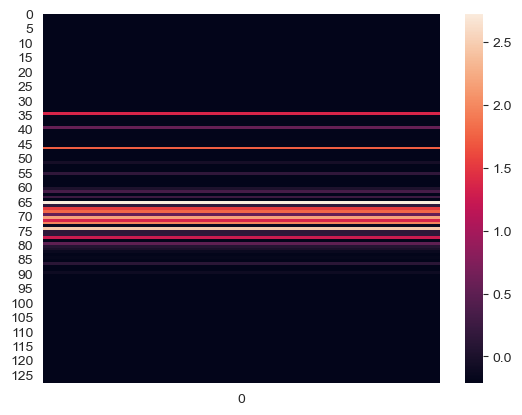

In [30]:
sns.heatmap(reduced)